In [1]:
!pip install pandas

In [3]:
!pip install numpy

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:\\ASSIGNMENT\\synthetic_lending_club_loan_data.csv')


# Display the first few rows of the dataframe
print(df.head())

# Display summary statistics
print(df.describe())

# Display the info of the dataframe
print(df.info())


   loan_amnt  term   int_rate  installment     annual_inc        dti  \
0      16795    36  19.854130  1135.898283   81609.758615  23.932018   
1       1860    60  13.509867   835.429911  113131.624555  14.771013   
2      39158    60  11.918700   846.536952   55222.550781  32.191551   
3      12284    60  12.420775   498.111990   46293.043468  22.632794   
4       7265    60  24.752991   753.026870   60797.485069  33.211360   

   open_acc  revol_bal  revol_util  total_acc loan_status  
0        10      13275   88.827220         72  Fully Paid  
1        27      39753   45.994195         42  Fully Paid  
2        20      34550   60.697312          9  Fully Paid  
3         9      19641   18.849985         25  Fully Paid  
4        17       6213   80.496683          2  Fully Paid  
          loan_amnt         term     int_rate  installment     annual_inc  \
count   1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   19706.983000    47.784000    15.003214   648.4

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

# Split the data into features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.83      0.99      0.91       167

    accuracy                           0.83       200
   macro avg       0.42      0.50      0.45       200
weighted avg       0.70      0.83      0.76       200



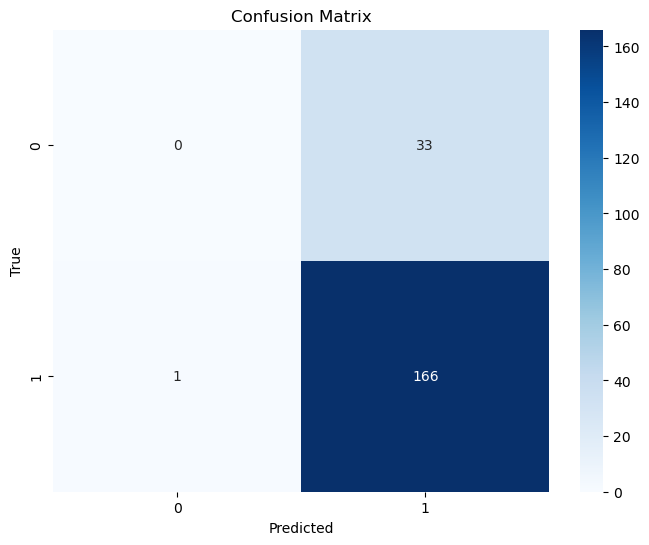

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
import joblib

# Assume 'model' is your trained model
model = ...  # Your model should be trained before saving

# Save the model
joblib.dump(model, 'loan_default_model.pkl')

print("Model saved successfully as 'loan_default_model.pkl'")



Model saved successfully as 'loan_default_model.pkl'


In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_test and y_test are your test data
predictions = loaded_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy Score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.83      0.99      0.91       167

    accuracy                           0.83       200
   macro avg       0.42      0.50      0.45       200
weighted avg       0.70      0.83      0.76       200



In [29]:
# Example new data (make sure it has the same feature structure as your training data)
new_data = [[5.1, 3.5, 1.4, 0.2,3.4,7.8,9.9,4.4,0.9,7.9]]  # Replace with actual new data

# Predict using the loaded model
predictions = loaded_model.predict(new_data)
print("Predictions for new data:", predictions)


Predictions for new data: [1]
